In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df = df.drop('customerID',axis=1)

In [5]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
# Handling missing values
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the OneHotEncoder
encoder = LabelEncoder()
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = encoder.fit_transform(df[cols])

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Feature Engineering

In [9]:
# # Creating new features based on existing ones
df['MonthlyChargesRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
df['TenureToAgeRatio'] = df['tenure'] / (df['tenure'] + df['SeniorCitizen'] + 1)
df['HasInternetService'] = np.where(df['InternetService'] == 0, 0, 1)
df['HasOnlineSecurity'] = np.where(df['OnlineSecurity'] == 0, 0, 1)
df['HasOnlineBackup'] = np.where(df['OnlineBackup'] == 0, 0, 1)
df['HasDeviceProtection'] = np.where(df['DeviceProtection'] == 0, 0, 1)
df['HasTechSupport'] = np.where(df['TechSupport'] == 0, 0, 1)
df['HasStreamingTV'] = np.where(df['StreamingTV'] == 0, 0, 1)
df['HasStreamingMovies'] = np.where(df['StreamingMovies'] == 0, 0, 1)

In [10]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [11]:
df['Churn'].unique()

array([0, 1])

## Exploratory Data Analysis

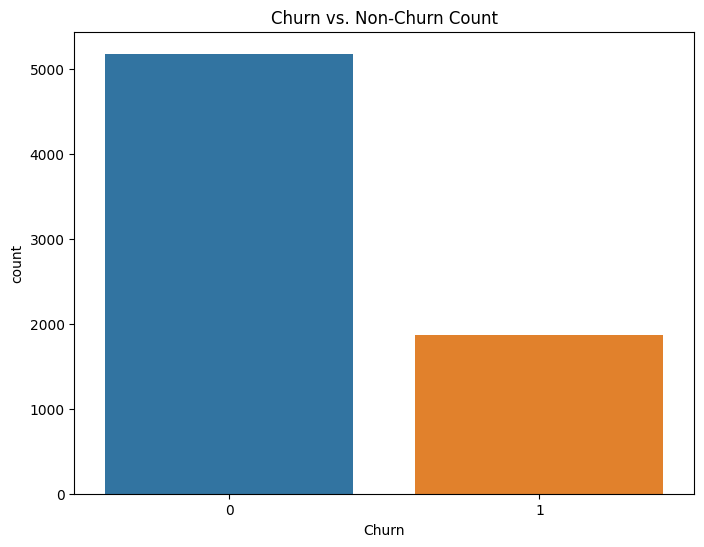

In [12]:
# Plotting count of churned vs. non-churned customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn vs. Non-Churn Count')
plt.show()

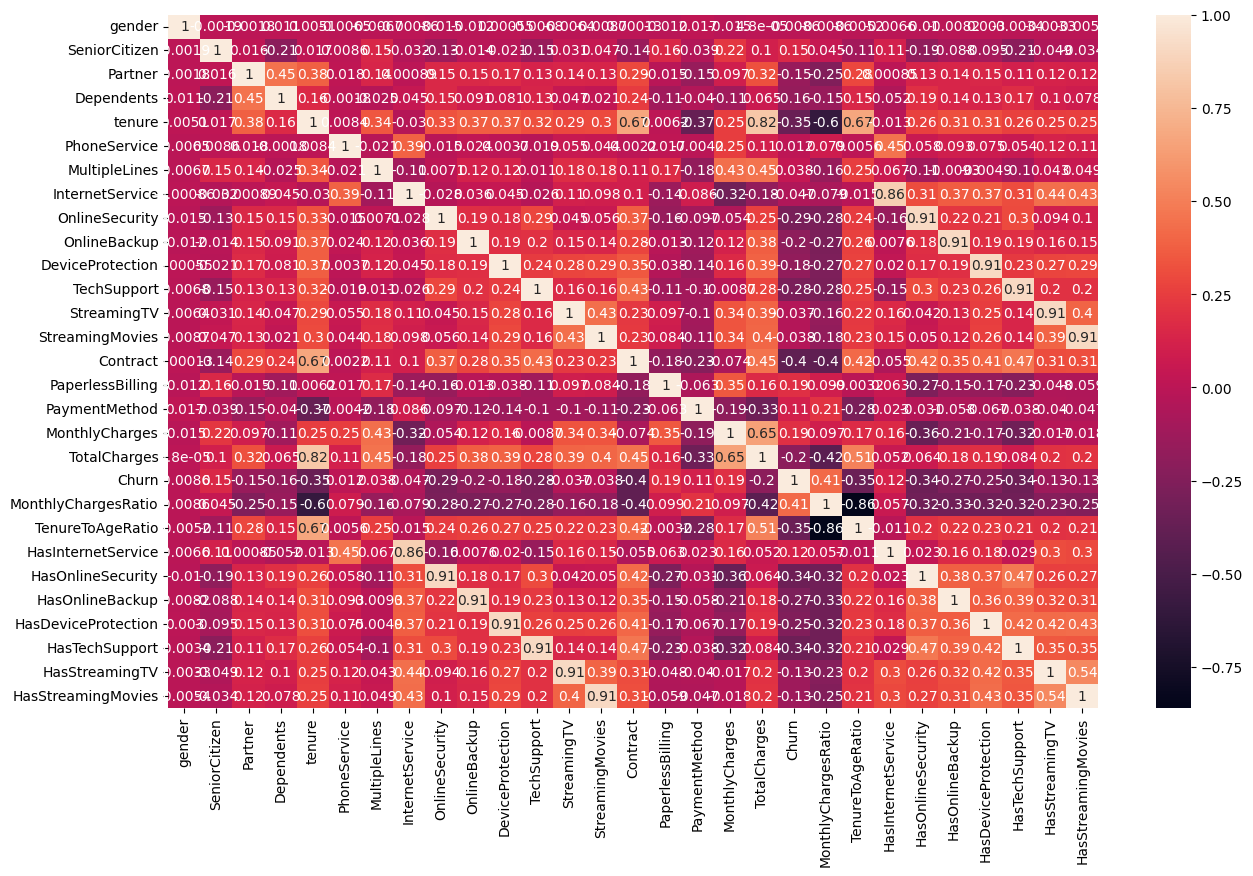

In [13]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

# model selection

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# F1 Score

In [16]:

# Defining models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), 
                                               ('gb', GradientBoostingClassifier())]),
    'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10),
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50),
    'Voting': VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), 
                                           ('gb', GradientBoostingClassifier())])
}

# Fit and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print()

Logistic Regression:
Accuracy: 0.8126330731014905
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Random Forest:
Accuracy: 0.7892122072391767
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Gradient Boosting:
Accuracy: 0.8097941802696949
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                          

# Confusion Matrix

Logistic Regression:
Accuracy: 0.8126330731014905
Confusion Matrix:
[[933 103]
 [161 212]]


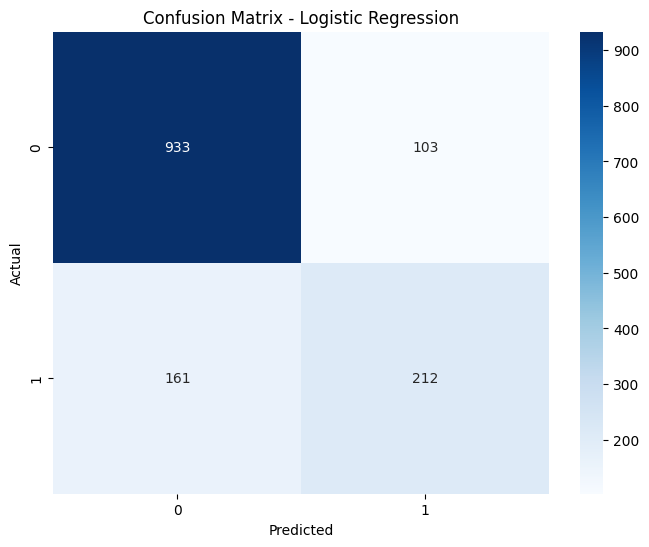


Random Forest:
Accuracy: 0.7863733144073811
Confusion Matrix:
[[937  99]
 [202 171]]


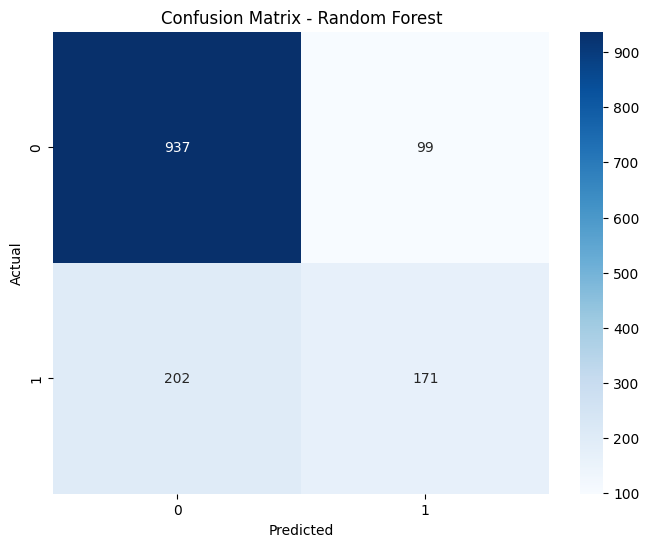


Gradient Boosting:
Accuracy: 0.8105039034776437
Confusion Matrix:
[[943  93]
 [174 199]]


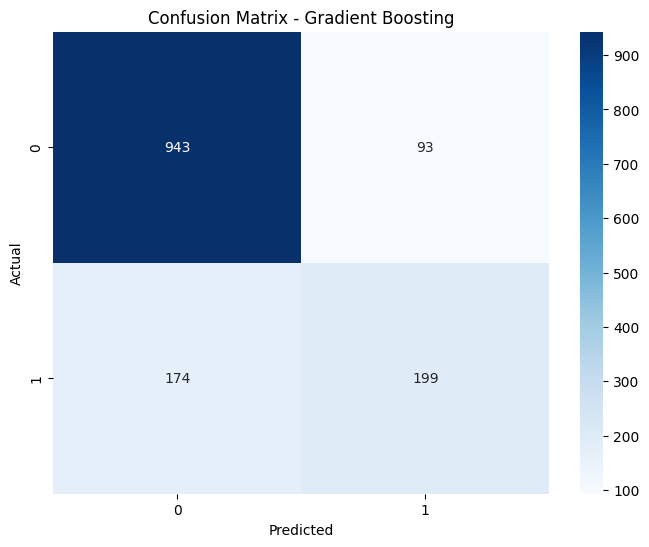


Support Vector Machine:
Accuracy: 0.7352732434350603
Confusion Matrix:
[[1036    0]
 [ 373    0]]


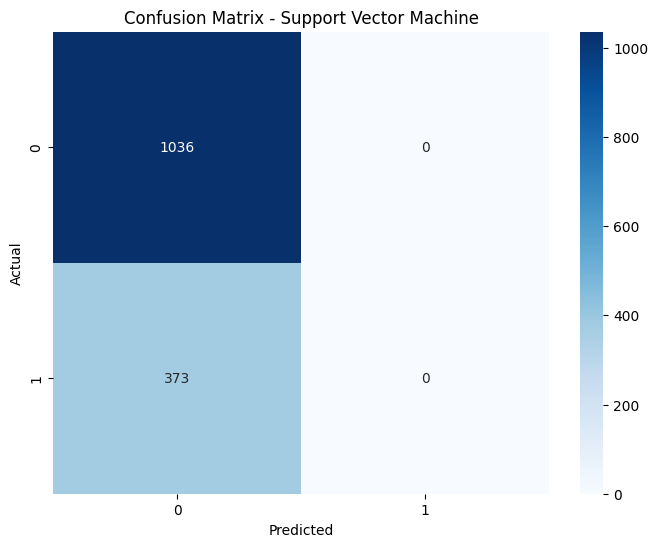


Stacking:
Accuracy: 0.8112136266855926
Confusion Matrix:
[[944  92]
 [174 199]]


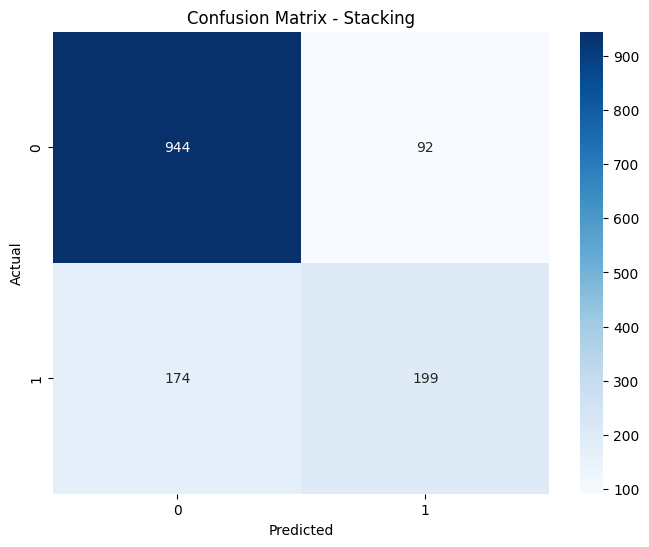


Bagging:
Accuracy: 0.8005677785663591
Confusion Matrix:
[[945  91]
 [190 183]]


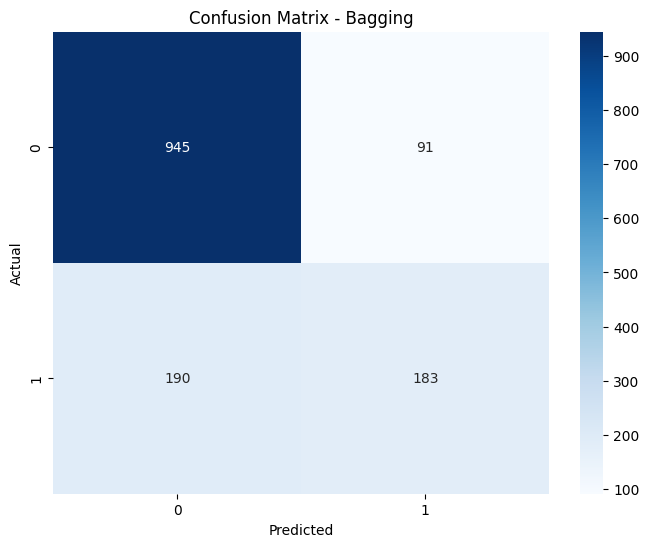


AdaBoost:
Accuracy: 0.7224982256919801
Confusion Matrix:
[[840 196]
 [195 178]]


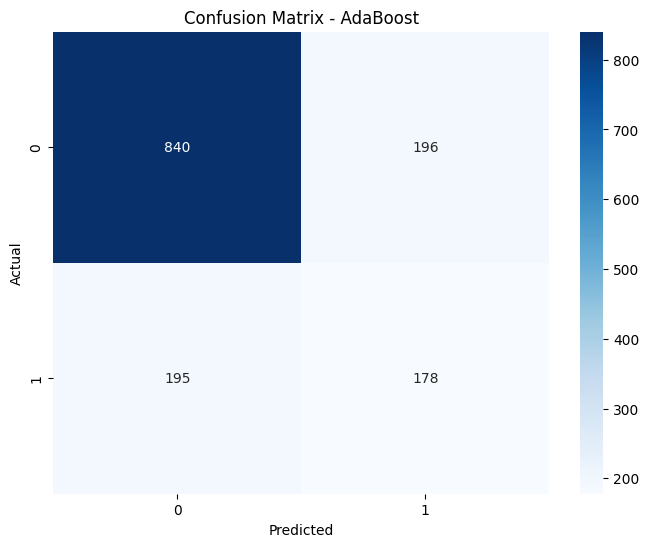


Voting:
Accuracy: 0.8097941802696949
Confusion Matrix:
[[941  95]
 [173 200]]


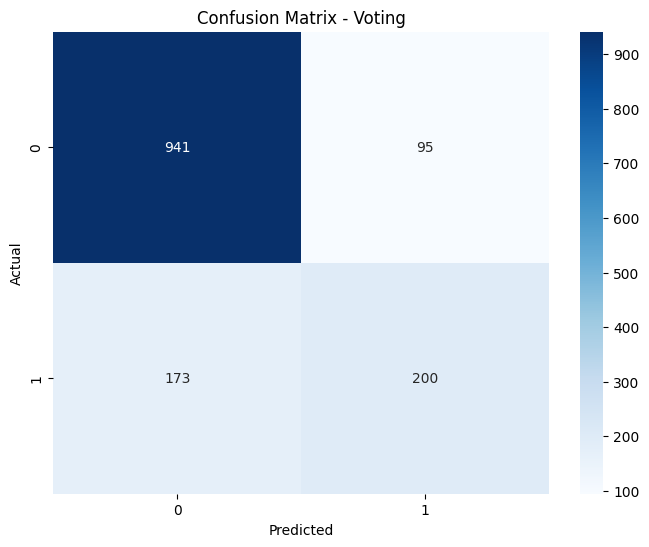

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Fit and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(cm)
    
    #Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()


In [18]:
import pickle

# Fit the voting model
voting_model = VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), 
                                           ('gb', GradientBoostingClassifier())])
voting_model.fit(X_train, y_train)

# Save the voting model
with open('voting_model.pkl', 'wb') as f:
    pickle.dump(voting_model, f)

